In [1]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np

In [2]:
connection = mysql.connector.connect(
user='root',
password='nitish1234',
host='localhost',
database='ecommerce')

In [3]:
cursor=connection.cursor()

In [4]:
cursor.execute("select * from product")
product_df=pd.DataFrame(cursor.fetchall(),columns=[col[0] for col in cursor.description])

cursor.execute("select * from order_details")
order_df=pd.DataFrame(cursor.fetchall(),columns=[col[0] for col in cursor.description])

cursor.execute("select * from customer")
customer_df=pd.DataFrame(cursor.fetchall(),columns=[col[0] for col in cursor.description])

cursor.close()
connection.close()

# Data cleaning for Product Table

In [5]:
product_df.shape

(500, 7)

In [6]:
product_df.head()

,product_id,product_name,category,sub_category,original_price,selling_price,stock
0,PROD001,Comics 1,Books,Comics,715.70,626.85,3
1,PROD002,Board Games 2,Toys,Board Games,159.15,115.68,85
2,PROD003,Fragrances 3,Beauty,Fragrances,634.99,402.74,23
3,PROD004,Tablets 4,Electronics,Tablets,650.69,390.70,43
4,PROD005,Snacks 5,Groceries,Snacks,57.67,45.26,89


In [7]:
product_df.tail()

,product_id,product_name,category,sub_category,original_price,selling_price,stock
495,PROD496,Non-Fiction 496,Books,Non-Fiction,207.00,131.91,86
496,PROD497,Footwear 497,Fashion,Footwear,432.46,222.26,7
497,PROD498,Action Figures 498,Toys,Action Figures,610.35,466.87,10
498,PROD499,Laptops 499,Electronics,Laptops,436.02,314.84,16
499,PROD500,Snacks 500,Groceries,Snacks,695.29,389.38,73


In [8]:
product_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      500 non-null    object 
 1   product_name    500 non-null    object 
 2   category        500 non-null    object 
 3   sub_category    500 non-null    object 
 4   original_price  500 non-null    float64
 5   selling_price   500 non-null    float64
 6   stock           500 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 27.5+ KB


In [9]:
product_df.describe()

,original_price,selling_price,stock
count,500.000000,500.000000,500.000000
mean,494.787560,343.636320,52.292000
std,288.221426,209.968289,29.399241
min,10.180000,6.700000,1.000000
25%,236.162500,167.907500,27.000000
50%,499.840000,342.540000,54.000000
75%,744.522500,499.622500,78.000000
max,999.970000,893.660000,100.000000


In [10]:
product_df.isnull().sum()

product_id        0
product_name      0
category          0
sub_category      0
original_price    0
selling_price     0
stock             0
dtype: int64

In [11]:
product_df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
495    False
496    False
497    False
498    False
499    False
Length: 500, dtype: bool

In [12]:
product_df.nunique()

product_id        500
product_name      500
category           10
sub_category       47
original_price    500
selling_price     500
stock              99
dtype: int64

In [13]:
product_df['category'].unique()

array(['Books', 'Toys', 'Beauty', 'Electronics', 'Groceries', 'Fashion',
       'Home Appliances', 'Automotive', 'Furniture', 'Sports'],
      dtype=object)

In [14]:
product_df['category'].value_counts()

category
Beauty             58
Groceries          57
Fashion            52
Electronics        51
Toys               48
Automotive         48
Furniture          48
Sports             47
Books              46
Home Appliances    45
Name: count, dtype: int64

In [15]:
product_df['category']=product_df['category'].replace('furniture','Furniture')
product_df['category'].value_counts()

category
Beauty             58
Groceries          57
Fashion            52
Electronics        51
Toys               48
Automotive         48
Furniture          48
Sports             47
Books              46
Home Appliances    45
Name: count, dtype: int64

# Data cleaning for Order Table

In [16]:
order_df.shape

(500, 8)

In [17]:
order_df.head()

,order_id,customer_id,product_id,quantity,total_price,payment_mode,order_date,order_status
0,1,CUST001,PROD001,5.0,3134.25,Debit Card,2024-02-25 22:33:11,Shipped
1,2,CUST002,PROD001,3.0,1880.55,Credit Card,2024-01-28 22:33:11,Cancelled
2,3,CUST003,PROD001,10.0,6268.50,Net Banking,2024-04-03 22:33:11,Cancelled
3,4,CUST004,PROD004,6.0,2344.20,Cash On Delivery,2024-04-15 22:33:11,Cancelled
4,5,CUST005,PROD004,9.0,3516.30,Debit Card,2023-10-30 22:33:11,Cancelled


In [18]:
order_df.tail()

,order_id,customer_id,product_id,quantity,total_price,payment_mode,order_date,order_status
495,496,CUST496,PROD259,8.0,2834.32,Debit Card,2023-11-20 22:33:11,Cancelled
496,497,CUST497,PROD421,5.0,2143.65,Cash On Delivery,2023-12-04 22:33:11,Shipped
497,498,CUST498,PROD102,4.0,2776.16,Debit Card,2024-05-22 22:33:11,Shipped
498,499,CUST499,PROD497,1.0,222.26,Net Banking,2023-12-26 22:33:11,Delivered
499,500,CUST500,PROD466,7.0,2310.63,Cash On Delivery,2023-11-08 22:33:11,Pending


In [19]:
order_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   order_id      500 non-null    int64         
 1   customer_id   500 non-null    object        
 2   product_id    500 non-null    object        
 3   quantity      500 non-null    float64       
 4   total_price   500 non-null    float64       
 5   payment_mode  500 non-null    object        
 6   order_date    500 non-null    datetime64[ns]
 7   order_status  500 non-null    object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 31.4+ KB


In [20]:
order_df.describe()

,order_id,quantity,total_price,order_date
count,500.000000,500.000000,500.00000,500
mean,250.500000,5.564000,1855.59076,2024-02-19 00:45:39.800000
min,1.000000,1.000000,15.39000,2023-08-22 22:33:11
25%,125.750000,3.000000,523.36750,2023-11-25 22:33:11
50%,250.500000,5.000000,1343.57500,2024-02-12 22:33:11
75%,375.250000,8.000000,2790.42750,2024-05-18 22:33:11
max,500.000000,10.000000,7903.50000,2024-08-18 22:33:11
std,144.481833,2.785934,1675.49541,NaN


In [21]:
order_df.isnull().sum()

order_id        0
customer_id     0
product_id      0
quantity        0
total_price     0
payment_mode    0
order_date      0
order_status    0
dtype: int64

In [22]:
order_df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
495    False
496    False
497    False
498    False
499    False
Length: 500, dtype: bool

In [23]:
order_df.nunique()

order_id        500
customer_id     500
product_id      246
quantity         10
total_price     453
payment_mode      4
order_date      260
order_status      4
dtype: int64

In [24]:
order_df['order_status'].value_counts()

order_status
Cancelled    137
Shipped      127
Delivered    122
Pending      114
Name: count, dtype: int64

# Data cleaning for Customer Table

In [25]:
customer_df.shape

(500, 7)

In [26]:
customer_df.head()

,customer_id,name,city,email,phone_no,address,pin_code
0,CUST001,Michael Solis,Austin,james53@example.net,098-408-0663,"50182 Cameron Causeway Suite 655, Lake Brian, ...",319608
1,CUST002,Michael Smith,Jacksonville,medwards@example.com,757-787-4318,"260 Patrick Light Apt. 016, West Thomasland, U...",901390
2,CUST003,Claire Rodriguez,San Antonio,david56@example.org,361-125-9390,"11123 Edward Mills, Joshuabury, WY 63081",883669
3,CUST004,Mercedes Bryan,Los Angeles,alyssa95@example.com,199-119-6042,"42229 Timothy Cove, Greenstad, IA 73568",177985
4,CUST005,Kenneth Clark,Phoenix,jhatfield@example.org,715-266-9568,"4215 Gomez Union, Christopherhaven, MO 70846",202341


In [27]:
customer_df.tail()

,customer_id,name,city,email,phone_no,address,pin_code
495,CUST496,Benjamin Hardin,New York,tanya05@example.net,394-869-7044,"47176 Robles Row Suite 172, East Teresa, ME 32071",704816
496,CUST497,Marvin Nash,San Antonio,bboyer@example.org,889-124-4023,"19258 Salazar River Apt. 100, Port Brandonmout...",897526
497,CUST498,Courtney Grimes,Dallas,bchristensen@example.com,745-851-1247,"81517 Walker Burgs, Garciastad, IL 36762",210787
498,CUST499,Kelsey Howe,Houston,mccoycandice@example.org,798-983-8439,"974 Deanna Fork, Ramirezshire, CO 58642",179603
499,CUST500,William Lawrence,Houston,paulsheri@example.com,662-800-3792,"7497 Tracy Via, South Thomas, MN 30634",979581


In [28]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   customer_id  500 non-null    object
 1   name         500 non-null    object
 2   city         500 non-null    object
 3   email        500 non-null    object
 4   phone_no     500 non-null    object
 5   address      500 non-null    object
 6   pin_code     500 non-null    int64 
dtypes: int64(1), object(6)
memory usage: 27.5+ KB


In [29]:
customer_df.describe()

,pin_code
count,500.00000
mean,556158.60000
std,262788.63469
min,100148.00000
25%,319676.25000
50%,569114.50000
75%,787090.25000
max,998454.00000


In [30]:
customer_df.isnull().sum()

customer_id    0
name           0
city           0
email          0
phone_no       0
address        0
pin_code       0
dtype: int64

In [31]:
customer_df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
495    False
496    False
497    False
498    False
499    False
Length: 500, dtype: bool

In [32]:
customer_df.nunique()

customer_id    500
name           499
city            15
email          500
phone_no       500
address        500
pin_code       500
dtype: int64

# Exploratory Data Analysis (EDA) and Visualization:

Identify the total number of customers City wise.

city
Austin           47
San Antonio      38
Indianapolis     37
Philadelphia     37
Houston          37
Columbus         35
San Jose         35
San Francisco    35
Los Angeles      31
New York         31
Dallas           31
Chicago          31
Phoenix          29
Jacksonville     24
San Diego        22
Name: count, dtype: int64


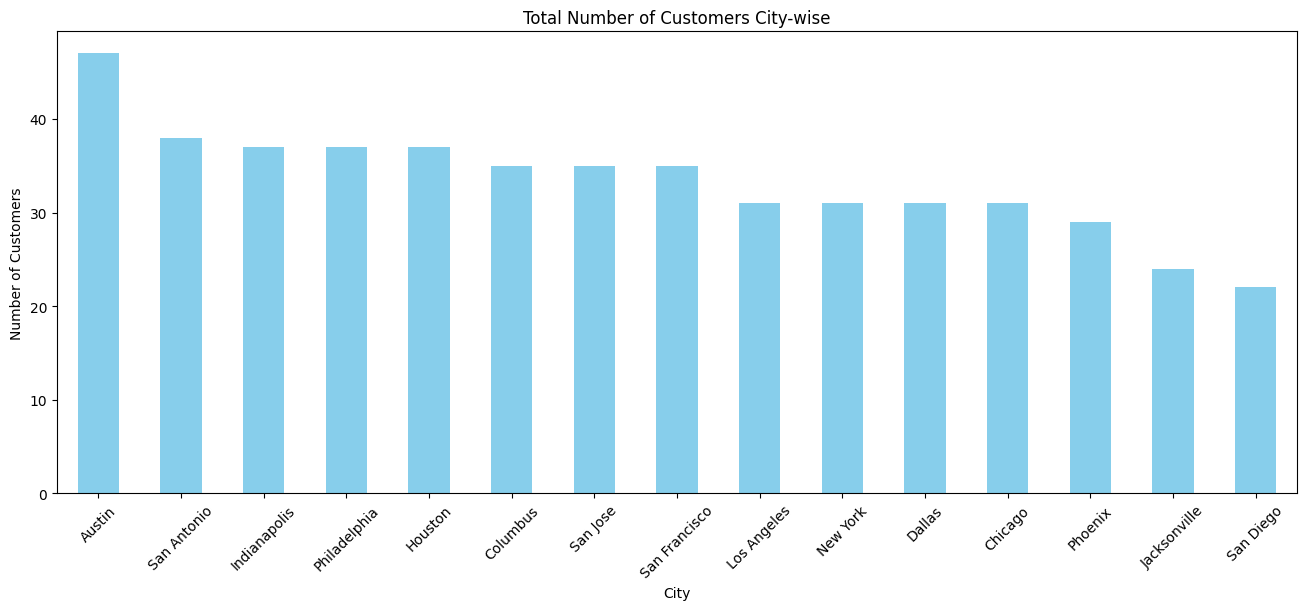

In [33]:
import matplotlib.pyplot as plt
city_counts = customer_df['city'].value_counts().head(50)
print(city_counts)
plt.figure(figsize=(16, 6))
city_counts.plot(kind='bar', color='skyblue')
plt.xlabel('City')
plt.ylabel('Number of Customers')
plt.title('Total Number of Customers City-wise')
plt.xticks(rotation=45)
plt.show()

# Observation:

Austin is the highest number of customers and San Diego is the lowest number of customer.

# Identify the most frequent customers based on their order history

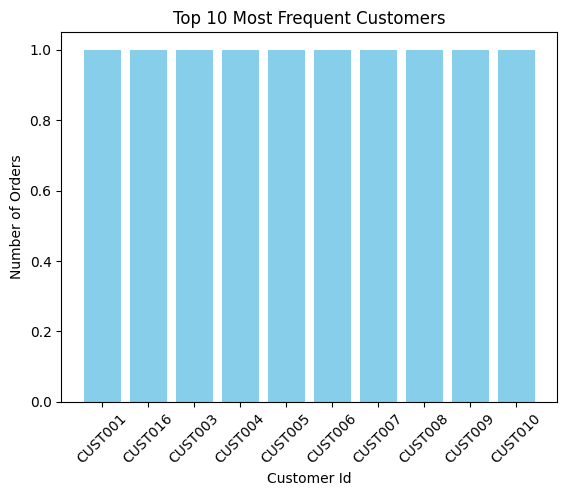

In [34]:
customer_counts = order_df['customer_id'].value_counts()
customer_counts = customer_counts.sort_values(ascending=False)
top_n = 10  # Change this value to select the desired number of top customers
top_customers = customer_counts[:top_n]
plt.bar(top_customers.index, top_customers.values,color='skyblue')
plt.xlabel('Customer Id')
plt.ylabel('Number of Orders')
plt.title('Top {} Most Frequent Customers'.format(top_n))
plt.xticks(rotation=45)
plt.show()

# Observation:

Within Top 10 most frequent customers id's are CUST001,CUST016,CUST003,CUST004,CUST005,CUST006,CUST007,CUST008,CUST009,CUST0010.

# Determine the total number of products available by category

category
Automotive         48
Beauty             58
Books              46
Electronics        51
Fashion            52
Furniture          48
Groceries          57
Home Appliances    45
Sports             47
Toys               48
Name: product_id, dtype: int64


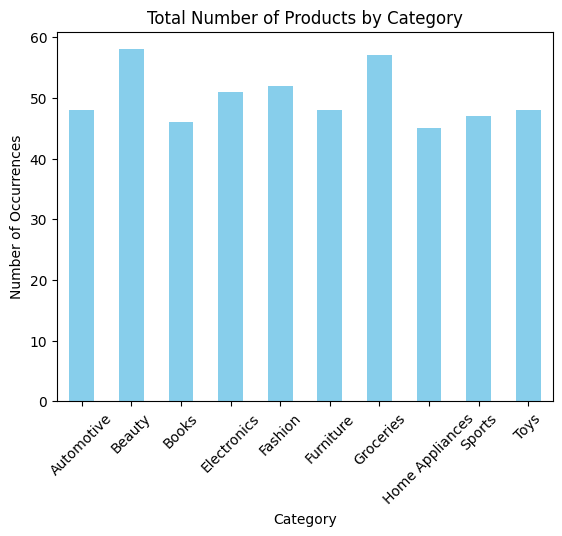

In [35]:
category_counts = product_df.groupby('category')['product_id'].count()
print(category_counts)
category_counts.plot(kind='bar',color='skyblue')
plt.xlabel('Category')
plt.ylabel('Number of Occurrences')
plt.title('Total Number of Products by Category')
plt.xticks(rotation=45)
plt.show()

 # Observation:

Highest number of occurrences of catagory is Beauty and then Appliance and lowest is Home Appliances.

# Analyze the distribution of products across sub-categories.

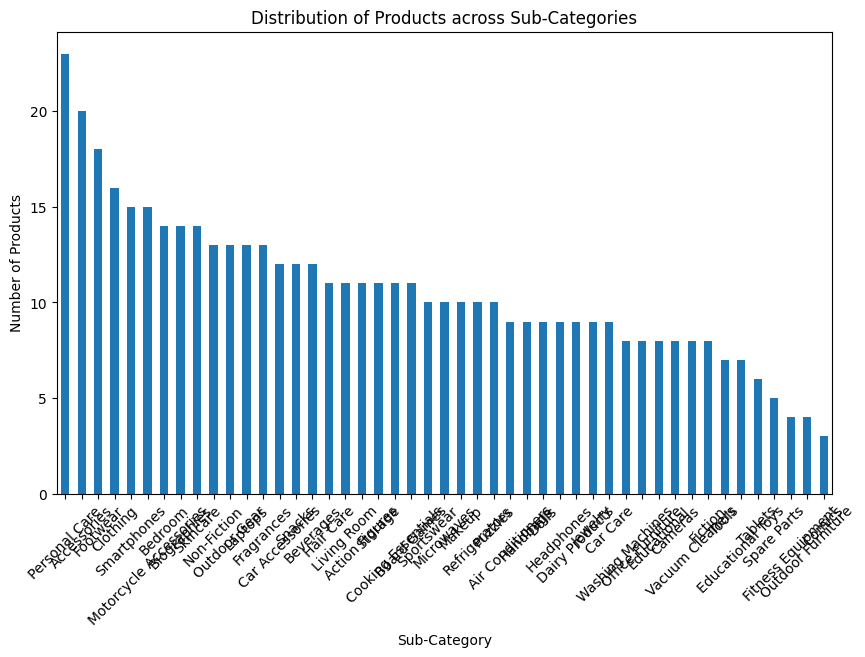

In [36]:
sub_category_counts = product_df['sub_category'].value_counts()
sub_category_counts = sub_category_counts.sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sub_category_counts.plot(kind='bar')
plt.xlabel('Sub-Category')
plt.ylabel('Number of Products')
plt.title('Distribution of Products across Sub-Categories')
plt.xticks(rotation=45)
plt.show()

# Observation:

Highest distribution of product across sub-category is PersonalCare and lowest are Printers to Outdoor Furmture.

# Identify products with low stock levels

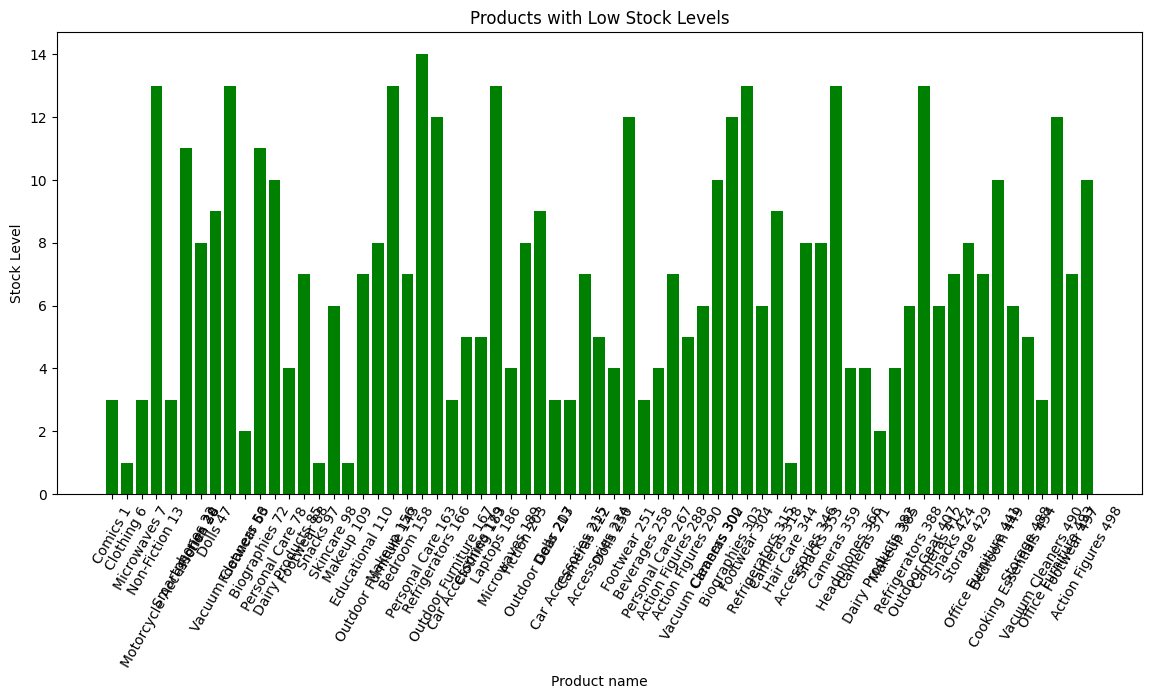

In [37]:
import matplotlib.pyplot as plt
low_stock_threshold = 15
low_stock_products = product_df[product_df['stock'] < low_stock_threshold]
# Set the figure size to increase width
plt.figure(figsize=(14, 6))  # Adjust the width and height as needed
# Draw a bar chart
plt.bar(low_stock_products['product_name'], low_stock_products['stock'], color='green')
# Adding labels and title
plt.xlabel('Product name')
plt.ylabel('Stock Level')
plt.title('Products with Low Stock Levels')
plt.xticks(rotation=60)
# Show the plot
plt.show()

# Observation

Lowest stock level  Comics1 and Dairy product and  Refrigerator and so on

# Calculate the average, maximum, and minimum selling prices for products

343.63632 893.66 6.7


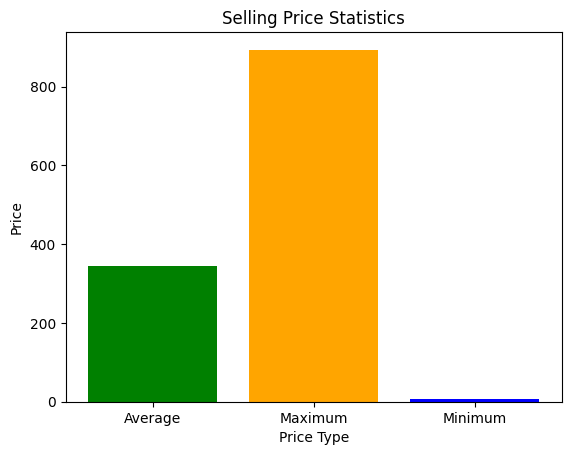

In [38]:
average_price = product_df['selling_price'].mean()
maximum_price = product_df['selling_price'].max()
minimum_price = product_df['selling_price'].min()
print(average_price, maximum_price, minimum_price)
data = {'Average':average_price, 'Maximum': maximum_price, 'Minimum': minimum_price}
plt.bar(data.keys(), data.values(),color=['green','orange','blue'])
plt.xlabel('Price Type')
plt.ylabel('Price')
plt.title('Selling Price Statistics')
plt.show()

# Observation:

Maximum Selling price for product is high, Average selling price for product is medium and minimum selling price for product is low.

# Calculate the top 10 orders product wise

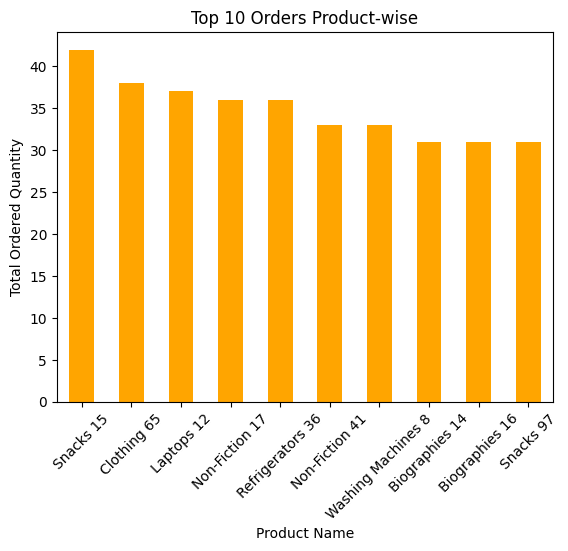

In [39]:
result_df = pd.merge(order_df, product_df, on='product_id', how='inner')

# Calculate the top 10 orders product-wise
top_orders = result_df.groupby('product_name')['quantity'].sum().nlargest(10)

# Draw a bar chart
top_orders.plot(kind='bar', color='orange')

# Adding labels and title
plt.xlabel('Product Name')
plt.ylabel('Total Ordered Quantity')
plt.title('Top 10 Orders Product-wise')
plt.xticks(rotation=45)
# Show the plot
plt.show()

# Observation:

Total highest order product is Tablet and 10th position product is Television.

# Analyze the order status distribution .

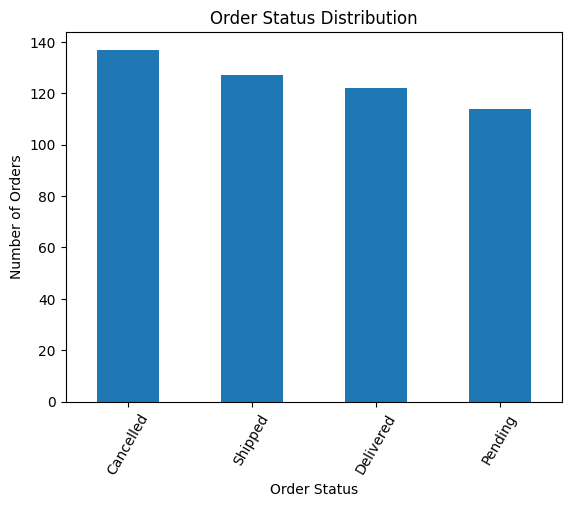

In [40]:
order_status_counts = order_df['order_status'].value_counts()

# Creating the bar chart
order_status_counts.plot(kind='bar')

# Adding labels and title
plt.xlabel('Order Status')
plt.ylabel('Number of Orders')
plt.title('Order Status Distribution')
plt.xticks(rotation=60)
# Display the chart
plt.show()

# Observation:
according to order status highest distributed product is Delivered and lowest is Returned product.

# dentify the most popular products based on order quantity

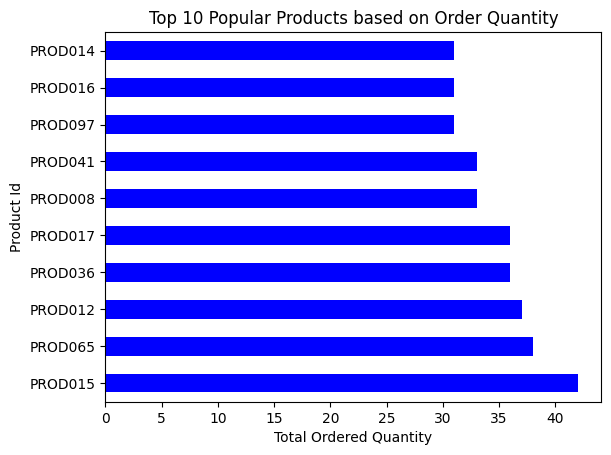

In [42]:
product_quantities = order_df.groupby('product_id')['quantity'].sum().sort_values(ascending=False)

# Selecting the top N products (change N to the desired number)
top_n = 10
top_products = product_quantities.head(top_n)

# Creating the horizontal bar chart
top_products.plot(kind='barh',color='blue')

# Adding labels and title
plt.xlabel('Total Ordered Quantity')
plt.ylabel('Product Id')
plt.title('Top {} Popular Products based on Order Quantity'.format(top_n))

# Display the chart
plt.show()

# Observation:
hihgest order quantity is PROD014 ad PROD016 ad  PROD97 lowest etc.

# Calculate total revenue generated from orders product wise

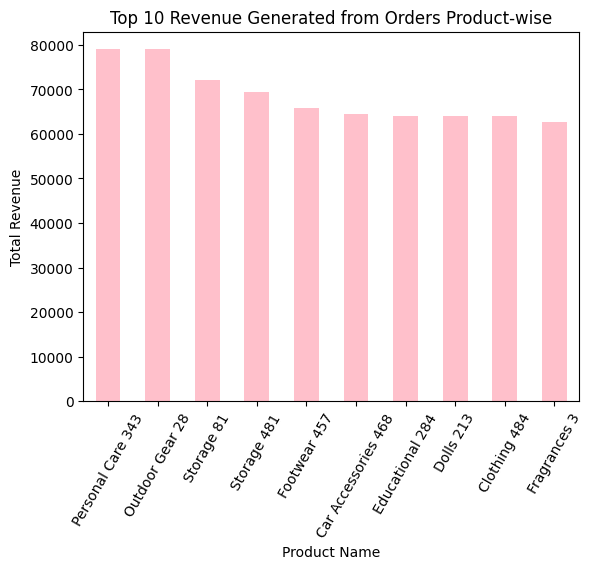

In [44]:
product_df['TotalRevenue'] = order_df['quantity'] * order_df['total_price']
product_revenue = product_df.groupby('product_name')['TotalRevenue'].sum().sort_values(ascending=False)
top_n = 10
product_revenue = product_revenue.head(top_n)

# Creating the bar chart
product_revenue.plot(kind='bar',color='pink')

# Adding labels and title
plt.xlabel('Product Name')
plt.ylabel('Total Revenue')
plt.title('Top 10 Revenue Generated from Orders Product-wise')
plt.xticks(rotation=60)
# Display the chart
plt.show()


# Observation:
According to the revenue PersonalCare343 is the highest revenue and Fragrances3 is the lowest revenue.

# Calculate total revenue product category wise percentage

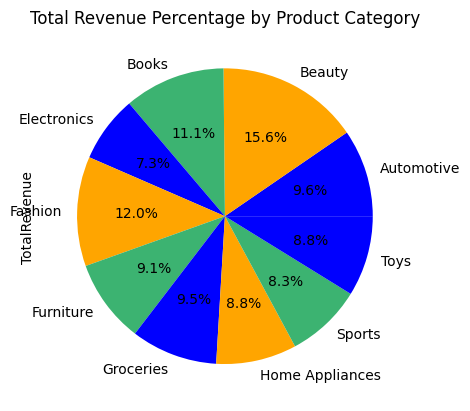

In [45]:
product_df['TotalRevenue'] = order_df['quantity'] * order_df['total_price']
category_revenue = product_df.groupby('category')['TotalRevenue'].sum()

# Calculate the percentage of total revenue for each category
total_revenue = product_df['TotalRevenue'].sum()
category_percentage = (category_revenue / total_revenue) * 100

# Creating the pie chart
category_percentage.plot(kind='pie', autopct='%1.1f%%', colors=['blue', 'orange', 'mediumseagreen'])

# Adding title
plt.title('Total Revenue Percentage by Product Category')

# Display the chart
plt.show()

# Observation:
Electronics total revenue is highest 15.6% and lowest revenue is 7.3%

# Calculate the total revenue generated from all orders

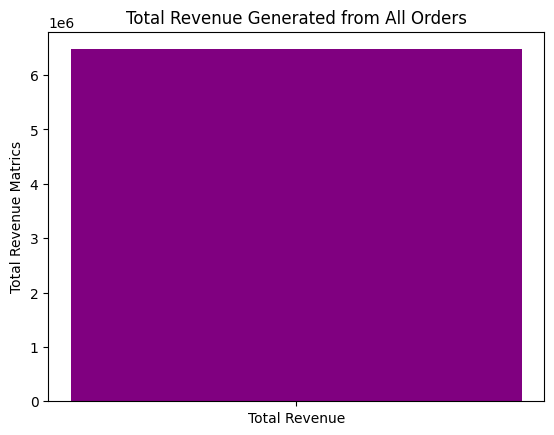

In [46]:
order_df['TotalRevenue'] = order_df['quantity'] * order_df['total_price']

# Calculate the total revenue
total_revenue = order_df['TotalRevenue'].sum()
print()
# Creating a bar chart for total revenue
plt.bar(['Total Revenue'], [total_revenue], color='purple')

# Adding labels and title
plt.ylabel('Total Revenue Matrics')
plt.title('Total Revenue Generated from All Orders')

# Display the chart
plt.show()

# Observation:
total revenue for all orfers is le6.0

# Identify the most profitable products based on the difference between original and selling prices

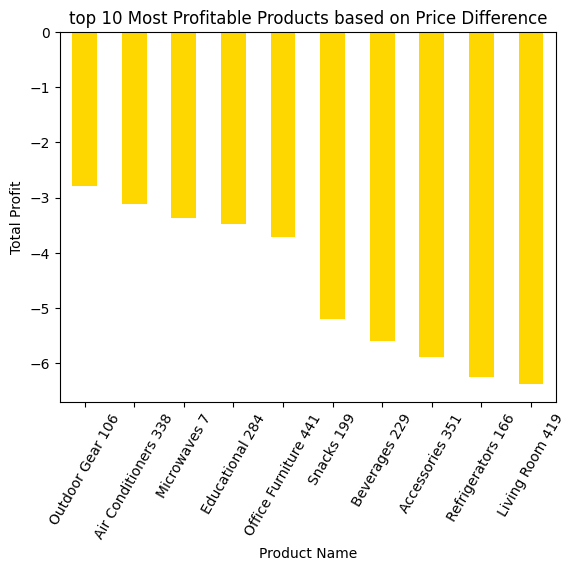

In [47]:
product_df['Profit'] =product_df['selling_price'] - product_df['original_price']
product_profit = product_df.groupby('product_name')['Profit'].sum().sort_values(ascending=False)

top_n = 10
product_profit = product_profit.head(top_n)
# Creating the bar chart
product_profit.plot(kind='bar', color='gold')

# Adding labels and title
plt.xlabel('Product Name')
plt.ylabel('Total Profit')
plt.title('top 10 Most Profitable Products based on Price Difference')
plt.xticks(rotation=60)
# Display the chart
plt.show()

# Observation:
Living Room 419 Device is the hig selling price and OutdoorGear106 is the lowest selling price.

# Identify product names with the highest and lowest order quantities

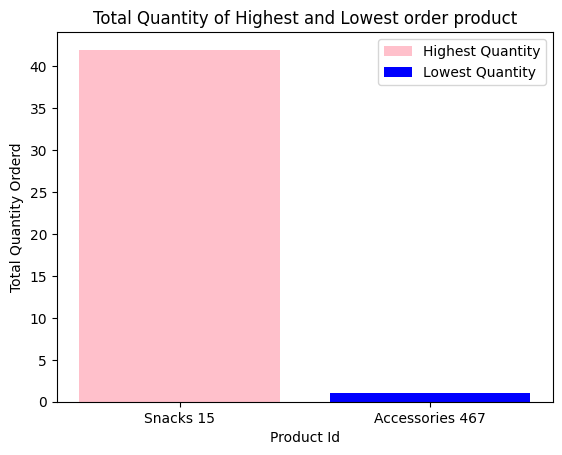

In [49]:
result_df = pd.merge(order_df, product_df, on='product_id', how='inner')

product_quantities = result_df.groupby('product_name')['quantity'].sum()

# Find the product with the highest order quantity
max_quantity_product = product_quantities.idxmax()

# Find the product with the lowest order quantity
min_quantity_product = product_quantities.idxmin()

# Creating the bar chart
#product_quantities.plot(kind='bar', color='skyblue')

# Highlighting the highest and lowest order quantities
plt.bar(max_quantity_product, product_quantities[max_quantity_product], color='pink', label='Highest Quantity')
plt.bar(min_quantity_product, product_quantities[min_quantity_product], color='blue', label='Lowest Quantity')

# Adding labels and title
plt.xlabel('Product Id')
plt.ylabel('Total Quantity Orderd')
plt.title('Total Quantity of Highest and Lowest order product')

# Adding legend
plt.legend()

# Observation:
 Snacks highest order product is Tablet and Accessories is the lowest .

# Identify customers with the highest and lowest order quantities by customer name

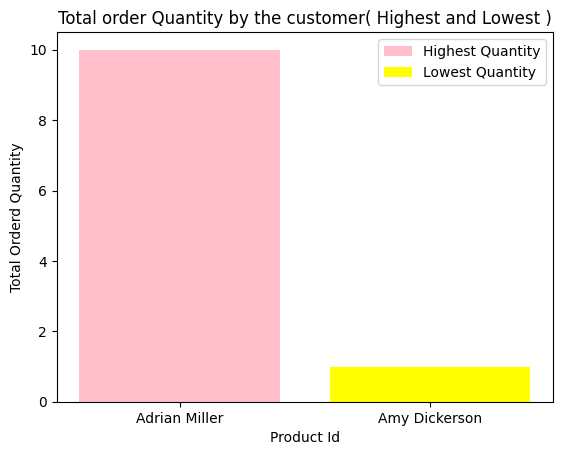

In [50]:
result_df = pd.merge(order_df, customer_df, on='customer_id', how='inner')

product_quantities = result_df.groupby('name')['quantity'].sum()

# Find the product with the highest order quantity
max_quantity_product = product_quantities.idxmax()

# Find the product with the lowest order quantity
min_quantity_product = product_quantities.idxmin()

# Creating the bar chart
#product_quantities.plot(kind='bar', color='skyblue')

# Highlighting the highest and lowest order quantities
plt.bar(max_quantity_product, product_quantities[max_quantity_product], color='pink', label='Highest Quantity')
plt.bar(min_quantity_product, product_quantities[min_quantity_product], color='yellow', label='Lowest Quantity')

# Adding labels and title
plt.xlabel('Product Id')
plt.ylabel('Total Orderd Quantity')
plt.title('Total order Quantity by the customer( Highest and Lowest )')

# Adding legend
plt.legend()

# Observation:
Adrian Miller highest quantity and Amy Dickerson is the lowest

# Determine the most preferred payment modes.

payment_mode
Credit Card         127
Net Banking         126
Cash On Delivery    125
Debit Card          122
Name: count, dtype: int64


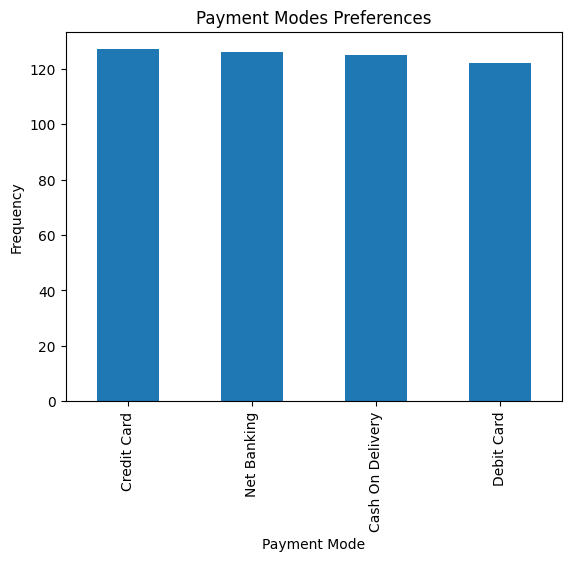

In [52]:
payment_modes_counts = order_df['payment_mode'].value_counts()
print(payment_modes_counts)
# Creating the bar chart
payment_modes_counts.plot(kind='bar')

# Adding labels and title
plt.xlabel('Payment Mode')
plt.ylabel('Frequency')
plt.title('Payment Modes Preferences')
plt.show()

# Observation:
customers are very preferred payment on every mode.

# Month wise total sales.

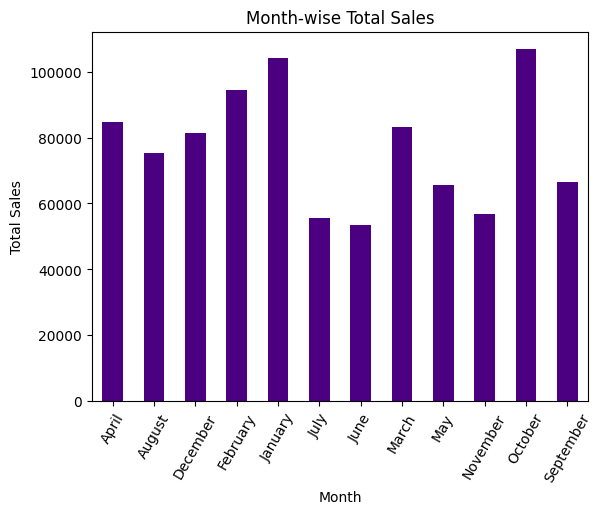

In [54]:
order_df['order_date'] = pd.to_datetime(order_df['order_date'])  # Convert 'OrderDate' to datetime format
order_df['Month'] = order_df['order_date'].dt.month_name()  # Extract month names from 'OrderDate'

# Group by month and calculate total sales
monthly_sales = order_df.groupby('Month')['total_price'].sum()

# Creating the bar chart
monthly_sales.plot(kind='bar', color='indigo')

# Adding labels and title
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Month-wise Total Sales')
plt.xticks(rotation=60)
# Display the chart
plt.show()

# Observation:
In month of January and October was highest sales, and in June was lowest.

# Month and year wise total sales

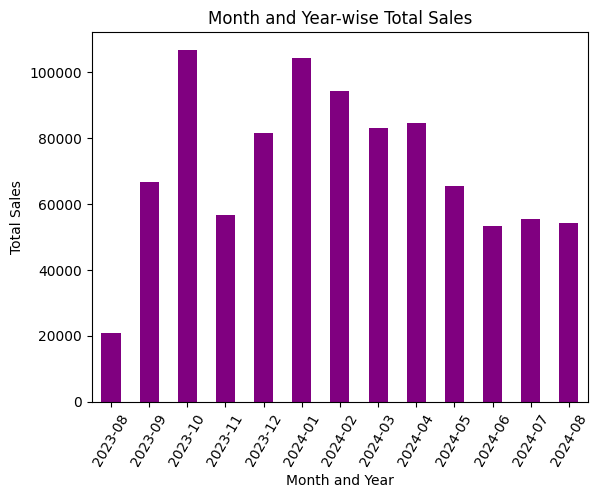

In [55]:
order_df['order_date'] = pd.to_datetime(order_df['order_date'])  # Convert 'OrderDate' to datetime format
order_df['MonthYear'] = order_df['order_date'].dt.to_period('M')  # Extract month and year as a Period object

# Group by month and year and calculate total sales
monthly_sales = order_df.groupby('MonthYear')['total_price'].sum()

# Creating the bar chart
monthly_sales.plot(kind='bar', color='purple')

# Adding labels and title
plt.xlabel('Month and Year')
plt.ylabel('Total Sales')
plt.title('Month and Year-wise Total Sales')
plt.xticks(rotation=60)
# Display the chart
plt.show()

# Observation:
in 2023-9 was the highest sales and 2023-8 was lowest.

# Identify peak order date

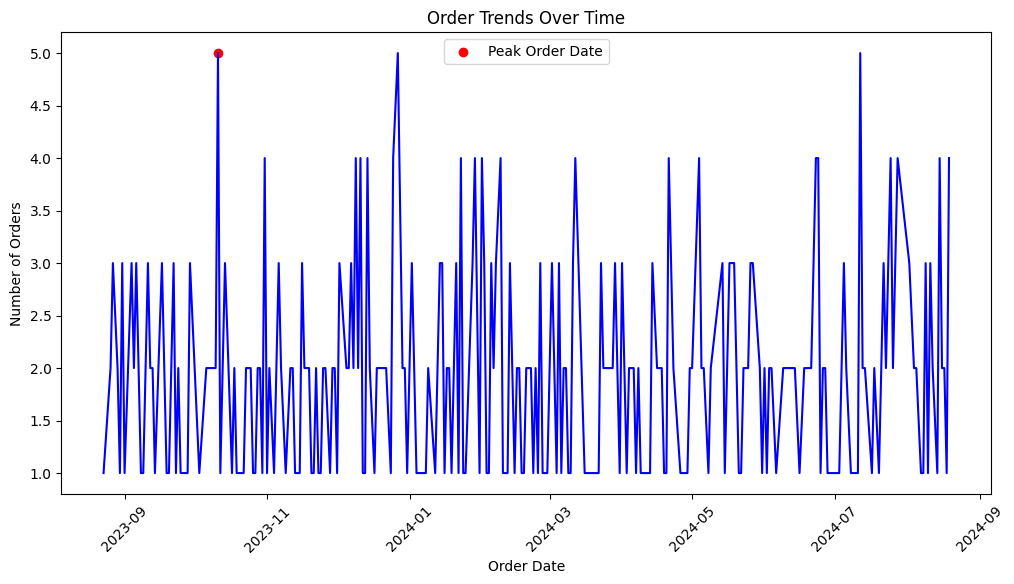

In [57]:
order_df['order_date'] = pd.to_datetime(order_df['order_date'])
# Group by order date and calculate the total number of orders for each date
orders_by_date = order_df.groupby('order_date').size()
# Find the peak order date
peak_order_date = orders_by_date.idxmax()
# Create a figure with a larger width
plt.figure(figsize=(12, 6))  # Adjust the width and height as needed
# Draw a line chart
plt.plot(orders_by_date.index, orders_by_date.values, color='blue')
# Highlight the peak order date with a red marker
plt.scatter(peak_order_date, orders_by_date.loc[peak_order_date], color='red', label='Peak Order Date')
# Adding labels and title
plt.xlabel('Order Date')
plt.ylabel('Number of Orders')
plt.title('Order Trends Over Time')
# Adding legend
plt.legend()
plt.xticks(rotation=45)
# Show the plot
plt.show()

# Observation:
Tokio's customer is highest orderd and Lake Buneva Vista is lowest

# Analyze whether certain products or categories are more popular in a specific city.

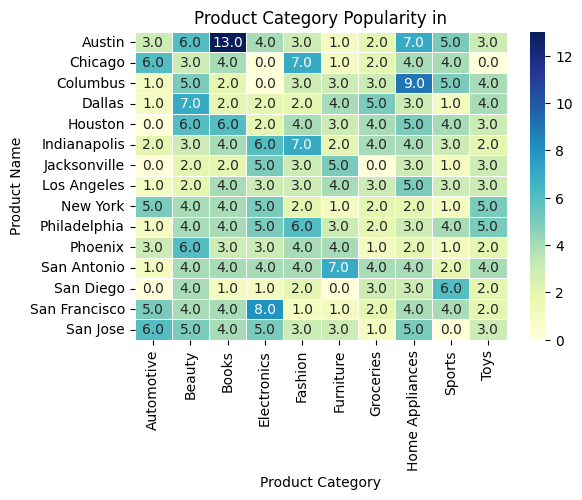

In [58]:
# Merge orders, products, and customers tables
merged_data = pd.merge(order_df, product_df, on='product_id', how='inner')
merged_data = pd.merge(merged_data, customer_df, on='customer_id', how='inner')

# Calculate the total quantity sold for each product category in the selected city
category_quantity_pivot = merged_data.groupby(['city','category']).size().unstack().fillna(0)

# Create a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(category_quantity_pivot, cmap='YlGnBu', annot=True, fmt='', linewidths=.5)
plt.title(f'Product Category Popularity in')
plt.xlabel('Product Category')
plt.ylabel('Product Name')
plt.show()

# Identify the best-selling products

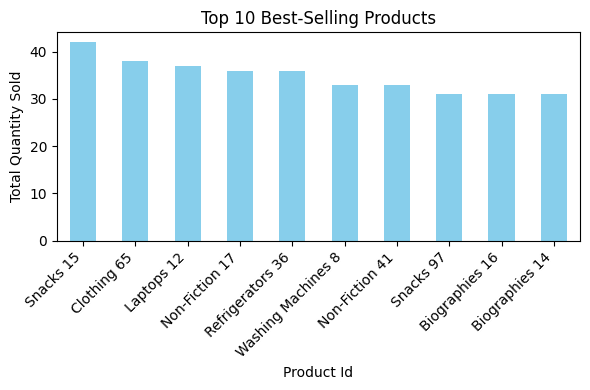

In [59]:
result_df = pd.merge(order_df, product_df, on='product_id', how='inner')

best_selling_products = result_df.groupby('product_name')['quantity'].sum().sort_values(ascending=False)

# Select the top N best-selling products (change N to the desired number)
top_n = 10
top_selling_products = best_selling_products.head(top_n)

# Creating the bar chart
plt.figure(figsize=(6, 4))
top_selling_products.plot(kind='bar', color='skyblue')

# Adding labels and title
plt.xlabel('Product Id')
plt.ylabel('Total Quantity Sold')
plt.title('Top {} Best-Selling Products'.format(top_n))

# Display the chart
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Observation:
Snacks is the highest selling product also Tablet and top 10 is Sold.

# Identify top 10 slow-moving products based on low sales

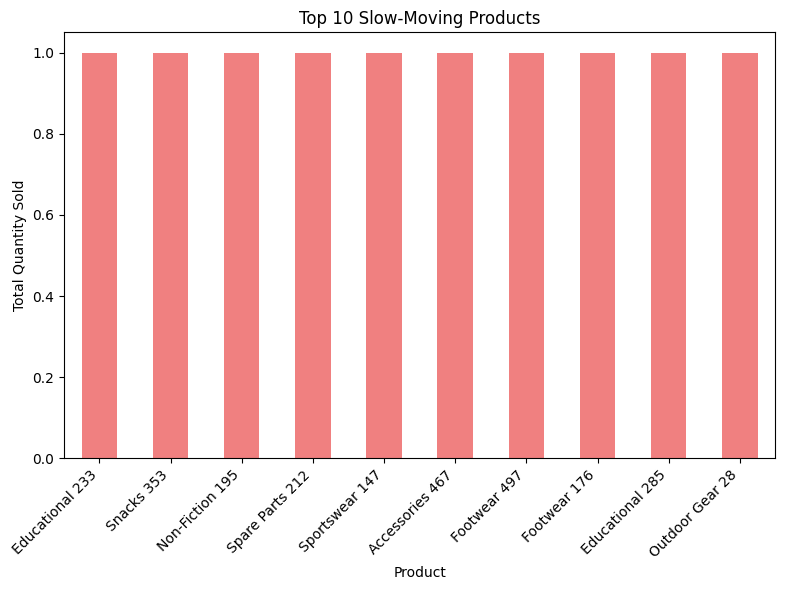

In [60]:
result_df = pd.merge(order_df, product_df, on='product_id', how='inner')

low_selling_products = result_df.groupby('product_name')['quantity'].sum().sort_values(ascending=True)

# Select the top 10 slow-moving products
top_slow_products = low_selling_products.head(10)

# Creating the bar chart
plt.figure(figsize=(6,4))
top_slow_products.plot(kind='bar', color='lightcoral',figsize=(8,6))

# Adding labels and title
plt.xlabel('Product')
plt.ylabel('Total Quantity Sold')
plt.title('Top 10 Slow-Moving Products')

# Display the chart
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Observation:
top 10 slow moving products are water purifire streaming device etc.

Conclusion:
# Product Table:
Check for product completeness and accuracy. Ensure that product information such as name, description, price, and availability is consistent and up-to-date.

# Customer Table:
Verify that customer information is accurate and complete. Assess customer demographics and purchasing behavior.
Order Table:
Analyze order data to understand customer preferences and popular products. Evaluate order fulfillment and delivery times. Monitor order status and identify any issues with the order processing system.
# Integration:
Ensure proper integration between the product, customer, and order tables to avoid inconsistencies and errors. Check for referential integrity, making sure that foreign keys in the order table correspond to primary keys in the product and customer tables.
Sales Analysis:
Calculate total sales, average order value, and other relevant metrics. Identify top-selling products and categories. Evaluate customer lifetime value and retention.
# Customer Experience:
Assess customer satisfaction based on order feedback or reviews. Identify any patterns or trends in customer issues.
Inventory Management:
Evaluate product stock levels and identify any products that are frequently out of stock. Optimize inventory management processes to prevent overstock or stockouts.
# Data Quality:
Ensure data accuracy and consistency across all tables. Regularly update and maintain the data to reflect changes in products, customers, and orders.
# Security:
Implement measures to secure customer data and ensure with privacy regulations.
# Future Considerations:
Explore opportunities for personalization based on customer preferences. Consider implementing data analytics and machine learning techniques for predictive analysis and improving business intelligence.